In [6]:
#!/usr/bin/env python
# coding: utf-8


import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
import pickle 

from helpers.synthesis_plots import *
from helpers.scatterplot_visualizers import *

plt.style.use("science.mplstyle")

dpi = 800

In [7]:
scatterplot_dir = "/global/ml4hep/spss/rrmastandrea/synth_SM_AD/NF_results_SSS/"


n_seed = 1 # just want one seed to compare scores I think

num_bkg = 340000
num_sig = 20000

In [8]:
# Load in the data


num_signals_to_inject = [0, 300, 500, 750, 1000, 1200, 1500, 2000, 2500, 3000]

synth_ids = ["feta", "cathode", "curtains", "salad"]


summary_dict_bkg, summary_dict_sig = {}, {}


# load in and concatentate data
for nn in num_signals_to_inject:

    all_results_bkg, all_results_sig = load_in_data(nn, num_bkg, "StandardScale", synth_ids, n_seed, scatterplot_dir)    
    concatenated_results_bkg, concatenated_results_sig = concatenate_scatterplot_data(all_results_bkg, all_results_sig, synth_ids, n_seed)

    summary_dict_bkg[nn] = concatenated_results_bkg
    summary_dict_sig[nn] = concatenated_results_sig
    

In [9]:
def get_highest_percentile(scores, num_ids_to_take):
    
    # array to keep track of the id
    ids = np.arange(len(scores))
    
    # sort the ids by the scores
    sorted_ids = [x for _,x in sorted(zip(scores,ids))]
    sorted_scores = [x for x,_ in sorted(zip(scores,ids))]

    # return the highest ids
    return(sorted_ids[-num_ids_to_take:])



In [10]:
random_1 = np.random.uniform(size = (concatenated_results_bkg["feta"].shape[0]))
random_2 = np.random.uniform(size = (concatenated_results_bkg["feta"].shape[0]))

all_overlap_bkg = {nn:[] for nn in num_signals_to_inject}
all_overlap_sig = {nn:[] for nn in num_signals_to_inject}

pairs_overlap_bkg = {}
pairs_overlap_sig = {}

for i, id_1 in enumerate(synth_ids):
    for j, id_2 in enumerate(synth_ids[i+1:]):
        pair_id = id_1 + "_" + id_2
        pairs_overlap_bkg[pair_id] = {nn:[] for nn in num_signals_to_inject}
        pairs_overlap_sig[pair_id] = {nn:[] for nn in num_signals_to_inject}     

random_overlap = []

percentiles = [0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

for p in percentiles:
    
    print(f"Evaluating percentile {p}...")
    
    # random
    num_ids_to_take_rand = int(p*summary_dict_bkg[nn]["feta"].shape[0])
    #print(f"Random: Taking the top {num_ids_to_take_rand} scores ({p} percentile)")

    random_1_ids = get_highest_percentile(random_1.flatten(), num_ids_to_take_rand)
    random_2_ids = get_highest_percentile(random_2.flatten(), num_ids_to_take_rand)

    random_ov = list(set(random_1_ids) & set(random_2_ids))
    random_overlap.append(float(len(random_ov))/num_ids_to_take_rand)

    for nn in num_signals_to_inject:
          
        print(f"Evaluating num. injected signal events {nn}...")

        # background
        num_ids_to_take_bkg = int(p*summary_dict_bkg[nn]["feta"].shape[0])
        #print(f"Background: Taking the top {num_ids_to_take_bkg} scores ({p} percentile)")
        
        local_ids_bkg = {}
        
        for iid in synth_ids:
            local_ids_bkg[iid] = get_highest_percentile(summary_dict_bkg[nn][iid].flatten(), num_ids_to_take_bkg)

        for i, id_1 in enumerate(synth_ids):
            for j, id_2 in enumerate(synth_ids[i+1:]):
                pair_id = id_1 + "_" + id_2
                
                loc_overlap_bkg = list(set(local_ids_bkg[id_1]) & set(local_ids_bkg[id_2]))
                pairs_overlap_bkg[pair_id][nn].append(float(len(loc_overlap_bkg))/num_ids_to_take_bkg)
                            
        grand_uni_bkg = list(set(local_ids_bkg["feta"]) & set(local_ids_bkg["cathode"]) & set(local_ids_bkg["curtains"]) & set(local_ids_bkg["salad"]))

        all_overlap_bkg[nn].append(float(len(grand_uni_bkg))/num_ids_to_take_bkg)
        

        # all
        num_ids_to_take_sig = int(p*summary_dict_sig[nn]["feta"].shape[0])
        
        local_ids_sig = {}
        
        for iid in synth_ids:
            local_ids_sig[iid] = get_highest_percentile(summary_dict_sig[nn][iid].flatten(), num_ids_to_take_sig)

        for i, id_1 in enumerate(synth_ids):
            for j, id_2 in enumerate(synth_ids[i+1:]):
                pair_id = id_1 + "_" + id_2
                
                loc_overlap_sig = list(set(local_ids_sig[id_1]) & set(local_ids_sig[id_2]))
                pairs_overlap_sig[pair_id][nn].append(float(len(loc_overlap_sig))/num_ids_to_take_sig)
                            
        grand_uni_sig = list(set(local_ids_sig["feta"]) & set(local_ids_sig["cathode"]) & set(local_ids_sig["curtains"]) & set(local_ids_sig["salad"]))

        all_overlap_sig[nn].append(float(len(grand_uni_sig))/num_ids_to_take_sig)
        
    print()

    



Evaluating percentile 0.005...
Evaluating num. injected signal events 0...
Evaluating num. injected signal events 300...
Evaluating num. injected signal events 500...
Evaluating num. injected signal events 750...
Evaluating num. injected signal events 1000...
Evaluating num. injected signal events 1200...
Evaluating num. injected signal events 1500...
Evaluating num. injected signal events 2000...
Evaluating num. injected signal events 2500...
Evaluating num. injected signal events 3000...

Evaluating percentile 0.01...
Evaluating num. injected signal events 0...
Evaluating num. injected signal events 300...
Evaluating num. injected signal events 500...
Evaluating num. injected signal events 750...
Evaluating num. injected signal events 1000...
Evaluating num. injected signal events 1200...
Evaluating num. injected signal events 1500...
Evaluating num. injected signal events 2000...
Evaluating num. injected signal events 2500...
Evaluating num. injected signal events 3000...

Evaluatin

In [11]:
pickle.dump( all_overlap_bkg, open( "all_overlap_bkg.p", "wb" ) )
pickle.dump( all_overlap_sig, open( "all_overlap_sig.p", "wb" ) )
pickle.dump( random_overlap, open( "random_overlap.p", "wb" ) )

pickle.dump( pairs_overlap_bkg, open( "pairs_overlap_bkg.p", "wb" ) )
pickle.dump( pairs_overlap_sig, open( "pairs_overlap_sig.p", "wb" ) )





In [12]:

all_overlap_bkg = pickle.load( open( "all_overlap_bkg.p", "rb" ) )
all_overlap_sig = pickle.load(  open( "all_overlap_sig.p", "rb" ) )
random_overlap = pickle.load(  open( "random_overlap.p", "rb" ) )


pairs_overlap_bkg = pickle.load(  open( "pairs_overlap_bkg.p", "rb" ) )
pairs_overlap_sig = pickle.load(  open( "pairs_overlap_sig.p", "rb" ) )



## For each signal injection, plot the overlap as a function of the score percentile

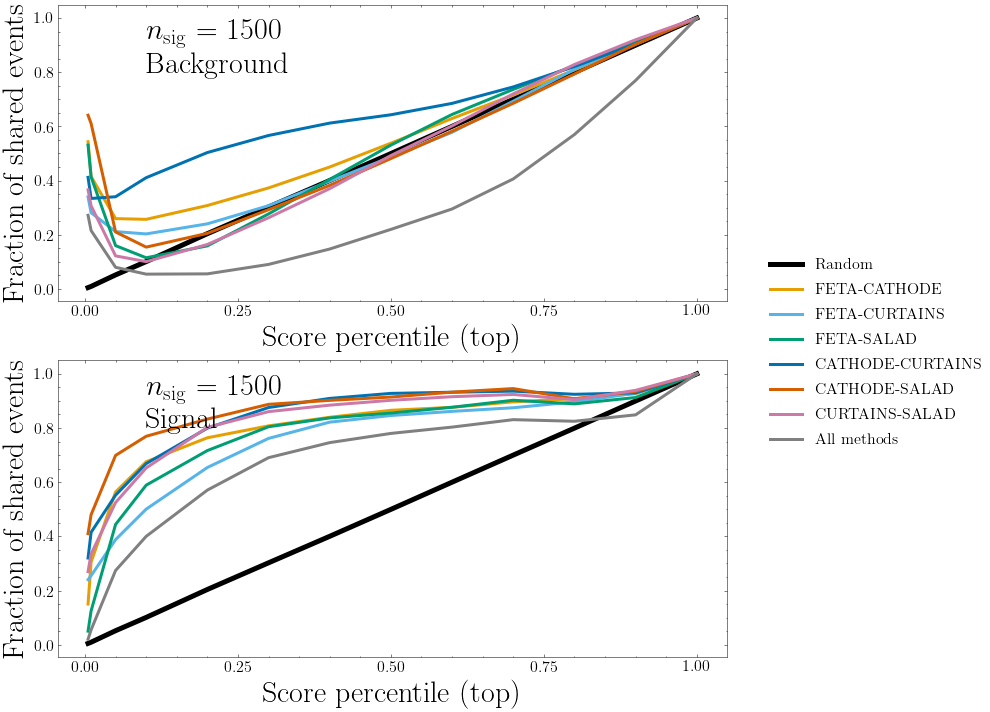

In [22]:
percentiles = [0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

fontsize = 30
small_font = 16

colors = ["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7"]




l = 3

num_to_plot = 1500


fig, ax = plt.subplots(2, 1, figsize = (12, 12))

ax[0].plot(percentiles, random_overlap, label = "Random", linewidth = l+2, color = "black")
ax[1].plot(percentiles, random_overlap, label = "Random", linewidth = l+2, color = "black")


k = 0
for i, id_1 in enumerate(synth_ids):
    for j, id_2 in enumerate(synth_ids[i+1:]):
        pair_id = id_1 + "_" + id_2
        
        plot_label = id_1.upper() + "-" + id_2.upper()

     

        ax[0].plot(percentiles, pairs_overlap_bkg[pair_id][num_to_plot], label = f"{plot_label}", linewidth = l, color = colors[k])
        ax[1].plot(percentiles, pairs_overlap_sig[pair_id][num_to_plot], label = f"{plot_label}", linewidth = l, color = colors[k])
        
        k += 1
        


ax[0].plot(percentiles, all_overlap_bkg[num_to_plot], label = "All methods", linewidth = l, color = "grey")
ax[1].plot(percentiles, all_overlap_sig[num_to_plot], label = "All methods", linewidth = l, color = "grey")



ax[0].legend(fontsize = small_font, bbox_to_anchor=(1.4, .2))
ax[0].set_xlabel("Score percentile (top)", fontsize = fontsize)
ax[0].set_ylabel("Fraction of shared events", fontsize = fontsize)
ax[0].set_xticks(ticks=[0, 0.25, 0.5, .75, 1])
ax[0].tick_params(axis='both', which='major', labelsize=small_font)
ax[0].text(.1, 0.8, f"$n_\\mathrm{{sig}}$ = {num_to_plot}\nBackground", fontsize = fontsize)



ax[1].set_xlabel("Score percentile (top)", fontsize = fontsize)
ax[1].set_ylabel("Fraction of shared events", fontsize = fontsize)
ax[1].set_xticks(ticks=[0, 0.25, 0.5, .75, 1])
ax[1].tick_params(axis='both', which='major', labelsize=small_font)
ax[1].text(.1, 0.8, f"$n_\\mathrm{{sig}}$ = {num_to_plot}\nSignal", fontsize = fontsize)





plt.show()

fig.savefig(f"plots/unification_{num_to_plot}.pdf", dpi = dpi)


## For each score pecentile, plot the overlap as a function of the signal injection

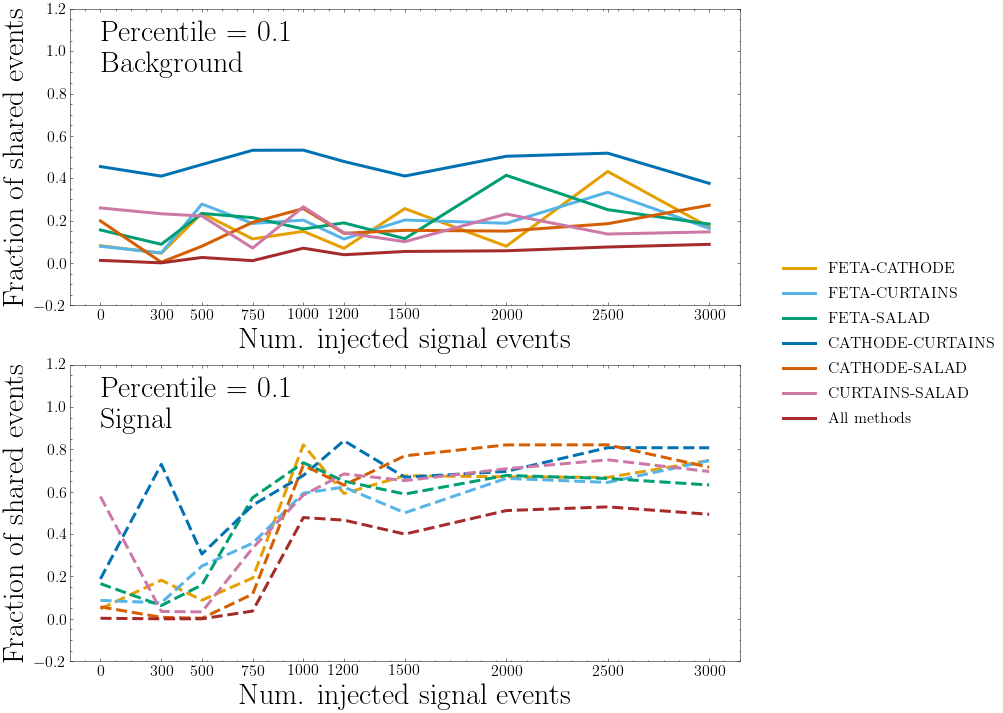

In [23]:
percentiles = [0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

fontsize = 30
small_font = 16

l = 3


target_percentile = .1
target_percentile_index = percentiles.index(target_percentile)






loc_overlaps_bkg = {}
loc_overlaps_sig = {}

for i, id_1 in enumerate(synth_ids):
    for j, id_2 in enumerate(synth_ids[i+1:]):
        pair_id = id_1 + "_" + id_2
        loc_overlaps_bkg[pair_id] = []
        loc_overlaps_sig[pair_id] = []
        


loc_all_overlap_bkg = []
loc_all_overlap_sig = []
    
    
for nn in num_signals_to_inject:
    
    for i, id_1 in enumerate(synth_ids):
        for j, id_2 in enumerate(synth_ids[i+1:]):
            pair_id = id_1 + "_" + id_2
            
            
            loc_overlaps_bkg[pair_id].append(pairs_overlap_bkg[pair_id][nn][target_percentile_index])
            loc_overlaps_sig[pair_id].append(pairs_overlap_sig[pair_id][nn][target_percentile_index])

    
    loc_all_overlap_bkg.append(all_overlap_bkg[nn][target_percentile_index])
    loc_all_overlap_sig.append(all_overlap_sig[nn][target_percentile_index])

fig, ax = plt.subplots(2, 1, figsize = (12, 12))

k = 0
for i, id_1 in enumerate(synth_ids):
    for j, id_2 in enumerate(synth_ids[i+1:]):
        pair_id = id_1 + "_" + id_2
        plot_label = id_1.upper() + "-" + id_2.upper()


        ax[0].plot(num_signals_to_inject, loc_overlaps_bkg[pair_id], label = f"{plot_label}", linewidth = l, color = colors[k])
        ax[1].plot(num_signals_to_inject, loc_overlaps_sig[pair_id], label = f"{plot_label}", linewidth = l, color = colors[k], linestyle = "dashed")
        
        k += 1


ax[0].plot(num_signals_to_inject, loc_all_overlap_bkg, label = "All methods", linewidth = l, color = "brown")
ax[1].plot(num_signals_to_inject, loc_all_overlap_sig,  label = "All methods", linewidth = l, color = "brown", linestyle = "dashed")



ax[0].legend(fontsize = small_font, bbox_to_anchor=(1.4, .2))
ax[0].set_ylim(-.2, 1.2)
ax[0].set_xlabel("Num. injected signal events", fontsize = fontsize)
ax[0].set_ylabel("Fraction of shared events", fontsize = fontsize)
ax[0].set_xticks(ticks=num_signals_to_inject)
ax[0].tick_params(axis='both', which='major', labelsize=small_font)
ax[0].text(1.1, 0.9, f"Percentile = {target_percentile}\nBackground", fontsize = fontsize)


ax[1].set_ylim(-.2, 1.2)
ax[1].set_xlabel("Num. injected signal events", fontsize = fontsize)
ax[1].set_ylabel("Fraction of shared events", fontsize = fontsize)
ax[1].set_xticks(ticks=num_signals_to_inject)
ax[1].tick_params(axis='both', which='major', labelsize=small_font)
ax[1].text(1.1, 0.9, f"Percentile = {target_percentile}\nSignal", fontsize = fontsize)





plt.show()

fig.savefig(f"plots/unification_percentile_{100*target_percentile}.pdf", dpi = dpi)
